# DAGs: D-Separation and Conditonal Independencies, Adjustment via Backdoor and Swigs, Equivalence Classes, Falsifiability Tests.


In [ ]:
#install and load package
install.packages("dagitty")
install.packages("ggdag")
library(dagitty)
library(ggdag)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘V8’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘viridis’, ‘graphlayouts’, ‘ggraph’, ‘ggrepel’, ‘igraph’, ‘tidygraph’




# Graph Generation and Plotting

The following DAG is due to Judea Pearl

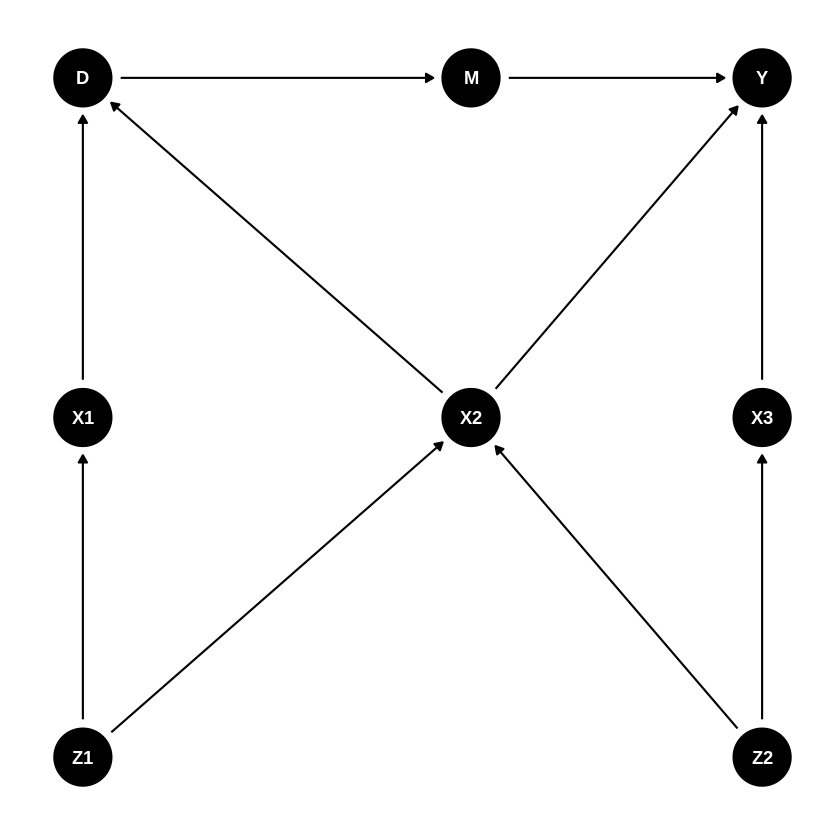

In [ ]:
#generate a couple of DAGs and plot them

G = dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
X2 -> Y
X2 -> D
M->Y
D->M
}')


ggdag(G) +  theme_dag()

In [ ]:
# Report Relatives of X2

In [ ]:
print(parents(G, "X2"))
print(children(G, "X2"))
print(ancestors(G, "X2"))
print(descendants(G, "X2"))

[1] "Z1" "Z2"
[1] "D" "Y"
[1] "X2" "Z2" "Z1"
[1] "X2" "Y"  "D"  "M" 


# Find Paths Between D and Y



In [ ]:
paths(G, "D", "Y")

$paths
[1] "D -> M -> Y"                         
[2] "D <- X1 <- Z1 -> X2 -> Y"            
[3] "D <- X1 <- Z1 -> X2 <- Z2 -> X3 -> Y"
[4] "D <- X2 -> Y"                        
[5] "D <- X2 <- Z2 -> X3 -> Y"            

$open
[1]  TRUE  TRUE FALSE  TRUE  TRUE

# List All Testable Implications of the Model

Here we use D-separation to list all the conditional independence relations deduced from the DAG.

In [ ]:
print( impliedConditionalIndependencies(G) )

D _||_ X3 | Z2
D _||_ X3 | X2, Z1
D _||_ X3 | X1, X2
D _||_ Y | M, X2, X3
D _||_ Y | M, X2, Z2
D _||_ Y | M, X2, Z1
D _||_ Y | M, X1, X2
D _||_ Z1 | X1, X2
D _||_ Z2 | X2, Z1
D _||_ Z2 | X1, X2
M _||_ X1 | D
M _||_ X2 | D
M _||_ X3 | Z2
M _||_ X3 | X2, Z1
M _||_ X3 | X1, X2
M _||_ X3 | D
M _||_ Z1 | X1, X2
M _||_ Z1 | D
M _||_ Z2 | X2, Z1
M _||_ Z2 | X1, X2
M _||_ Z2 | D
X1 _||_ X2 | Z1
X1 _||_ X3
X1 _||_ Y | M, X2, X3
X1 _||_ Y | M, X2, Z2
X1 _||_ Y | M, X2, Z1
X1 _||_ Y | D, X2, X3
X1 _||_ Y | D, X2, Z2
X1 _||_ Y | D, X2, Z1
X1 _||_ Z2
X2 _||_ X3 | Z2
X3 _||_ Z1
Y _||_ Z1 | X1, X2, Z2
Y _||_ Z1 | D, X2, Z2
Y _||_ Z1 | X1, X2, X3
Y _||_ Z1 | D, X2, X3
Y _||_ Z1 | M, X2, Z2
Y _||_ Z1 | M, X2, X3
Y _||_ Z2 | X2, X3, Z1
Y _||_ Z2 | X1, X2, X3
Y _||_ Z2 | D, X2, X3
Y _||_ Z2 | M, X2, X3
Z1 _||_ Z2


# Testing DAG Validity by Checking Implied Conditional Independencies.

We found all the implied conditional independence relations above. Can we test them?  The answer is yes, and is particularly simple if the DAG is associated with a liner SEM.

To illustrate, we simulate the data from a Linear SEM associated to DAG G, and perform a test of conditional independence restrictions, exploting linearity.


There are many other options for nonlinear models and discrete categorical variabales. Type help(localTests).

In [ ]:
set.seed(1)
x <- simulateSEM(G, N=10000)
head(x)
#cov(x)
localTests(G, data = x, type = c("cis"))

,D,M,X1,X2,X3,Y,Z1,Z2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.6594194,1.08983888,-0.5055821,0.4973987,1.24443811,-0.66373764,-0.6970727,-0.5575279
2,-0.4814627,1.87140938,0.8360605,0.6831001,0.35630195,-0.04750331,0.3969829,1.7813102
3,1.0827609,-0.02761751,-0.2873145,1.1695959,0.50514512,-0.50813176,0.3856674,0.2508686
4,1.4184813,-0.96159809,-0.7705086,0.7899625,-0.02773565,-1.21154746,-1.4512572,-0.6021566
5,-0.2635543,-1.96595669,0.4607391,0.4844504,0.28926785,0.86802898,0.3247187,-1.2032043
6,0.3916740,-1.27655868,0.1909338,2.1746097,-0.22652401,-0.84898399,0.3076881,0.8828852


,estimate,p.value,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
D _||_ X3 | Z2,-0.0034958794,0.72669938,-0.023095347,0.016106274
"D _||_ X3 | X2, Z1",0.0085925478,0.39030682,-0.011011337,0.028189831
"D _||_ X3 | X1, X2",0.0093353298,0.35065132,-0.010268580,0.028932067
"D _||_ Y | M, X2, X3",0.0039904414,0.68994734,-0.015613791,0.023591607
"D _||_ Y | M, X2, Z2",0.0083495617,0.40387254,-0.011255291,0.027947999
"D _||_ Y | M, X2, Z1",0.0078414277,0.43308497,-0.011763391,0.027440222
"D _||_ Y | M, X1, X2",0.0094000055,0.34734777,-0.010204886,0.028997674
"D _||_ Z1 | X1, X2",-0.0014840516,0.88205222,-0.021085469,0.018118506
"D _||_ Z2 | X2, Z1",0.0002341192,0.98132637,-0.019368000,0.019836059


Next we replaced $D$ by $\bar D$ generated differently:
$$
\bar D= (D + Y)/2
$$
So basically $\bar D$ is an average of $D$ and $Y$ generated by $D$.  We then test if the resulting collection of random variables satisifes conditional indepdendence restrictions, exploiting linearity.  We end up rejectiong these restrictions and thefore the validity of this model for the data generated in this way.  This makes sense, because the new data no longer obeys the previous DAG structure.



In [ ]:
x.R = x
x.R$D = (x$D+ x$Y)/2

localTests(G, data = x.R, type = c("cis"))



,estimate,p.value,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
D _||_ X3 | Z2,0.3087453088,1.177499e-12,0.227163124,0.386665999
"D _||_ X3 | X2, Z1",0.3706635903,4.760085e-18,0.292464135,0.445311849
"D _||_ X3 | X1, X2",0.3673586426,1.000752e-17,0.288952541,0.442191140
"D _||_ Y | M, X2, X3",0.6805141653,5.287228e-76,0.638289260,0.742809147
"D _||_ Y | M, X2, Z2",0.7219037133,2.811103e-91,0.688862902,0.785294217
"D _||_ Y | M, X2, Z1",0.7373462493,7.188066e-98,0.708230058,0.801542632
"D _||_ Y | M, X1, X2",0.7375961760,5.562694e-98,0.708546047,0.801807675
"D _||_ Z1 | X1, X2",0.0110743319,8.053738e-01,-0.076867294,0.098845431
"D _||_ Z2 | X2, Z1",-0.2103799291,2.018067e-06,-0.292981478,-0.124822666


# Identification by Backdoor: List minimal adjustment sets to identify causal effecs $D \to Y$

In [ ]:
print( adjustmentSets( G, "D", "Y" ) )

# Identification via SWIG and D-separation

In [ ]:
SWIG = dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Yd [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
d [pos="-1, 1.5"]
Md [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Yd
Z2 -> X2
X2 -> Yd
X2 -> D
X3-> Yd
Md-> Yd
d-> Md
}')

ggdag(SWIG)+  theme_dag()



# Deduce Conditional Exogeneity or Ignorability by D-separation


In [ ]:
paths(SWIG, "D", "Yd")

In [ ]:
print( impliedConditionalIndependencies(SWIG)[5:8] )


In [ ]:
x.R = x
x.R$D = (x$D+ x$Y)/2

localTests(G, data = x.R, type = c("cis"))



* # Print All Average Treament Effects Identifiable by Conditioning

In [ ]:
for( n in names(G) ){
    for( m in children(G,n) ){
        a <- adjustmentSets( G, n, m )
        if( length(a) > 0 ){
            cat("The effect ",n,"->",m,
                " is identifiable by controlling for:\n",sep="")
            print( a, prefix=" * " )
        }
    }
}

# Equivalence Classes

In [ ]:
P=equivalenceClass(G)
plot(P)
#equivalentDAGs(G,10)

Next Consider the elemntary Triangular Model:
$$
D \to Y, \quad X \to (D,Y).
$$
This model has not testable implications and is Markov-equivalent to any other DAG difined on names $(X, D, Y)$.

In [ ]:
G3<- dagitty('dag{
D -> Y
X -> D
X -> Y
}
')

ggdag(G3)+  theme_dag()

print(impliedConditionalIndependencies(G3))



In [ ]:
P=equivalenceClass(G3)
plot(P)
equivalentDAGs(G3,10)



# Falsifiability

See Testing Validity of DAGs above.
